<h1 align="center">Cellular Automaton: Conway's Game of Life</h1>

Se representan las celulas vivas y muertas utilizando un numpy array con 0 y 1.

In [1]:
%matplotlib inline

import numba
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import scipy as sp
import sys
from ipywidgets import interact, interactive, fixed

In [2]:
def next_generation(a):
    array = np.copy(a)
    dies_x = [0]
    dies_y = [0]
    reprod_x = [0]
    reprod_y = [0]
    for i in range(1, (len(array) - 1)):
        for j in range(1, (len(array) - 1)):
            vecinos = np.sum(array[i-1:i+2,j-1:j+2])
            if (array[i,j] == 1):
                vecinos -= 1
                if (vecinos > 3):
                    dies_x.append(i)
                    dies_y.append(j)
                elif (vecinos < 2):
                    dies_x.append(i)
                    dies_y.append(j)
            else:
                if (vecinos == 3):
                    reprod_x.append(i)
                    reprod_y.append(j)
    
    for i in range(1, len(dies_x)):
        array[dies_x[i], dies_y[i]] = 0
        
    for i in range(1, len(reprod_x)):
        array[reprod_x[i], reprod_y[i]] = 1
        
    return array

 Se implemento la funcion next_generation, que retorna la siguiente generacion de un array.
 Esta no considera los bordes del array, esto para evitarme problemas con los indices al recorrer el array y hacerme la vida mas facil.
 Ya que no se consideran los bordes, estos no seran mostrados en la visualizacion mas adelante.

 Para el profiling simplemente utilizo timeit para tener una idea del rendimiento de la funcion implementada:

In [3]:
a = np.random.rand(100,100)
a = a>0.7
a = a.astype(int)

t1 = %timeit -o -n 10 next_generation(a)

10 loops, best of 3: 63.3 ms per loop


Luego utilizo numba para mejorar el rendimiento de la implementacion:

In [4]:
@numba.jit()
def next_generation(a):
    array = np.copy(a)
    dies_x = [0]
    dies_y = [0]
    reprod_x = [0]
    reprod_y = [0]
    for i in range(1, (len(array) - 1)):
        for j in range(1, (len(array) - 1)):
            vecinos = np.sum(array[i-1:i+2,j-1:j+2])
            if (array[i,j] == 1):
                vecinos -= 1
                if (vecinos > 3):
                    dies_x.append(i)
                    dies_y.append(j)
                elif (vecinos < 2):
                    dies_x.append(i)
                    dies_y.append(j)
            else:
                if (vecinos == 3):
                    reprod_x.append(i)
                    reprod_y.append(j)
    
    for i in range(1, len(dies_x)):
        array[dies_x[i], dies_y[i]] = 0
        
    for i in range(1, len(reprod_x)):
        array[reprod_x[i], reprod_y[i]] = 1
        
    return array

In [5]:
a = np.random.rand(100,100)
a = a>0.7
a = a.astype(int)

t2 = %timeit -o -n 10 next_generation(a)

The slowest run took 83.94 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 795 µs per loop


Finalmente para la visualizacion de resultados, utilizo la funcion get_results para crear una lista que almacena n generaciones que se obtienen a partir de un array inicial dado. Los resultados excluyen los bordes del array por motivos ya mencionados.

Luego creo la funcion show_result con el motivo de utilizarla con interact para visualizar los datos.

El widget creado nos muestra las n generaciones que creamos.

Primero muestro un ejemplo con un array especifico creado, luego de eso muestro uno con un array randomizado.

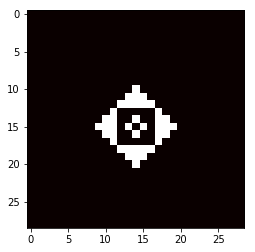

<function __main__.show_result>

In [6]:
def get_results(array, n):
    results = list()
    size = len(array)
    for i in range(n):
        print(type(array))
        results.append(array[1:size-1,1:size-1])
        array = next_generation(array)
    return results

def show_result(results, n):
    plt.imshow(results[n-1], cmap="hot")
    plt.show()
    
array = np.zeros((31,31))
array[15,15] = 1
array[16,14] = 1
array[16,15] = 1
array[16,16] = 1
array[17,14] = 1
array[17,16] = 1
array[18,15] = 1

res = get_results(array, 20)

interact(show_result, results=fixed(res), n=(1,20))

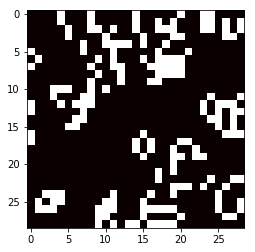

<function __main__.show_result>

In [7]:
a = np.random.rand(31,31)
a = a>0.7
a = a.astype(int)

res = get_results(a, 50)

interact(show_result, results=fixed(res), n=(1,50))